In [1]:
import pandas as pd

rfm = pd.read_csv("../data/processed/rfm.csv")
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,165,11,372.86
1,12347,3,2,1323.32
2,12348,74,1,222.16
3,12349,43,3,2671.14
4,12351,11,1,300.93


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(
    rfm[['Recency', 'Frequency', 'Monetary']]
)


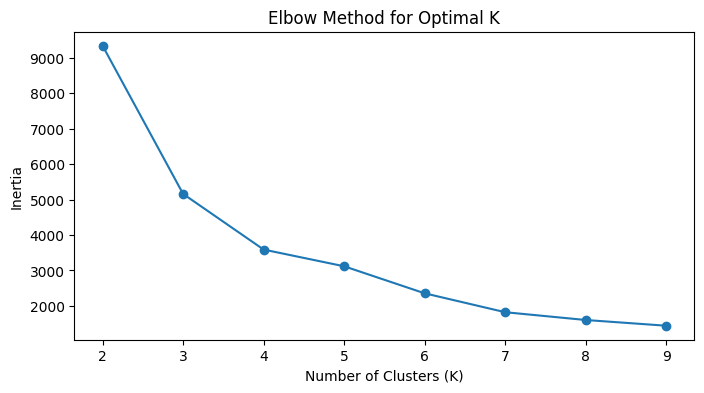

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [4]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346,165,11,372.86,1
1,12347,3,2,1323.32,0
2,12348,74,1,222.16,0
3,12349,43,3,2671.14,0
4,12351,11,1,300.93,0


In [5]:
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})

cluster_summary


,Recency,Frequency,Monetary,Count
Cluster,,,,
0,42.996882,4.469598,1743.129790,3207
1,242.976122,1.659981,596.884493,1047
2,5.600000,113.600000,215543.670000,5
3,15.433962,48.547170,29040.181566,53


In [6]:
rfm.to_csv("../data/processed/rfm_clustered.csv", index=False)

K-Means clustering was applied on standardized RFM features to uncover latent behavioral segments. The optimal number of clusters was selected using the Elbow Method, and clusters were interpreted using aggregated RFM statistics to derive actionable customer personas.